# **Problem** **Statement**

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  


# **Feature Description**

label	:  Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}	(Target Variable)

msisdn :	mobile number of user	

aon	:  age on cellular network in days	

daily_decr30	:  Daily amount spent from main account, averaged over last 30
                 days (in Indonesian Rupiah)	
 
daily_decr90 :	Daily amount spent from main account, averaged over last 90
                days (in Indonesian Rupiah)	

rental30 :	Average main account balance over last 30 days	

rental90 :	Average main account balance over last 90 days	

last_rech_date_ma :	Number of days till last recharge of main account	

last_rech_date_da :	Number of days till last recharge of data account	

last_rech_amt_ma :	Amount of last recharge of main account (in Indonesian 
                    Rupiah)	

cnt_ma_rech30 :	Number of times main account got recharged in last 30 days	

fr_ma_rech30 :	Frequency of main account recharged in last 30 days	

sumamnt_ma_rech30 :	Total amount of recharge in main account over last 30 days 
                    (in Indonesian Rupiah)	

medianamnt_ma_rech30 :	Median of amount of recharges done in main account over 
                        last 30 days at user level (in Indonesian Rupiah)	

medianmarechprebal30 :	Median of main account balance just before recharge in 
                        last 30 days at user level (in Indonesian Rupiah)	

cnt_ma_rech90 :  Number of times main account got recharged in last 90 days	

fr_ma_rech90 :	Frequency of main account recharged in last 90 days	

sumamnt_ma_rech90 :  Total amount of recharge in main account over last 90 days 
                    (in Indonasian Rupiah)	

medianamnt_ma_rech90 :	Median of amount of recharges done in main account over 
                        last 90 days at user level (in Indonasian Rupiah)	

medianmarechprebal90 :	Median of main account balance just before recharge in 
                        last 90 days at user level (in Indonasian Rupiah)	

cnt_da_rech30 :  Number of times data account got recharged in last 30 days	

fr_da_rech30 :	Frequency of data account recharged in last 30 days	

cnt_da_rech90	:  Number of times data account got recharged in last 90 days	

fr_da_rech90	:  Frequency of data account recharged in last 90 days	

cnt_loans30 : 	Number of loans taken by user in last 30 days	

amnt_loans30	:  Total amount of loans taken by user in last 30 days	

maxamnt_loans30	:  maximum amount of loan taken by the user in last 30 days	
                    (There are only two options: 5 & 10 Rs., for which the user 
                    needs to pay back 6 & 12 Rs. respectively)

medianamnt_loans30 :	Median of amounts of loan taken by the user in last 30 
                      days

cnt_loans90	:  Number of loans taken by user in last 90 days	

amnt_loans90	:  Total amount of loans taken by user in last 90 days	

maxamnt_loans90	:  maximum amount of loan taken by the user in last 90 days	

medianamnt_loans90 :	Median of amounts of loan taken by the user in last 90 
                      days	

payback30	:  Average payback time in days over last 30 days	

payback90	:  Average payback time in days over last 90 days	

pcircle	:  telecom circle	

pdate	:  date	


# Import needed modules and get the required dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#get the datset in pandas dataframe
mc_df = pd.read_csv('/content/drive/MyDrive/Data file.csv')
mc_df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
# remove extra index column
mc_df.drop('Unnamed: 0',axis = 1,inplace = True)

# EDA, Data Cleaning and Pre-Processing

In [4]:
#get basic info
mc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

* The dataframe has 209593 rows and 36 columns.
* Out of 36 columns 3 are of dtype 'object'.
* There are no null values present in any column.




In [5]:
#check for constant columns
con_cols = [col for col in mc_df.columns if mc_df[col].nunique() == 1]
print(con_cols)
mc_df.drop(con_cols, axis = 1, inplace = True)  #drop constant columns

['pcircle']


There is one column 'pcircle' whose values are all same, this is a redundant column, so we drop it.

In [6]:
# 'msisdn' is an object dtype column which has user mobile numbers
# all rows should have a unique 'msisdn' value, means there should be 209593 unique mobile numbers
# let's check if users are duplicated or not (if users are duplicated that means there are multiple rows in the dataset of same user )
mc_df['msisdn'].nunique()

186243

We can see that there are not 209593 unique mobile numbers in this dataset, this means that there can be duplicate rows in our dataset.

In [7]:
#remove duplicate rows and check how many duplicate rows were removed
total_rows_before = len(mc_df['msisdn'])
mc_df.drop_duplicates(keep = 'first', inplace = True,ignore_index=True)
total_rows_after = len(mc_df['msisdn'])
print('total_duplicate_rows : ', total_rows_before - total_rows_after)

total_duplicate_rows :  1


There was only one duplicate row, but there are 20k+ repeated mobile numbers out of 209593 numbers, means the data has repeated mobile numbers with different informations, maybe the data was colleted at different dates for the same mobile number user. 

In [8]:
# drop 'msisdn' as mobile number of a user cannot help in predicting if a user is defaulter or not.
mc_df.drop('msisdn',axis = 1,inplace = True) 

In [9]:
# As there is not much information given regarding the variable 'pdate'
# I have assumed that this variable holds the records of dates when the information of user accounts were collected
# so according to the assumption, I think this variable does not contribute in predicting if an user is defaulter or not, so let us drop this variable.
mc_df.drop('pdate', axis = 1, inplace = True)

In [10]:
# removing the variable 'pdate' generates a possibility of new duplicate rows which were not detected before only because of different dates
# let's check this possibilty by removing duplicate rows and check how many duplicate rows were removed
total_rows_before = len(mc_df['label'])
mc_df.drop_duplicates(keep = 'first', inplace = True,ignore_index = True)
total_rows_after = len(mc_df['label'])
print('total duplicate rows after removing pdate : ', total_rows_before - total_rows_after)

total duplicate rows after removing pdate :  385


As we can see after removing the 'pdate' column, we could identify 385 hidden duplicate rows, and successfully remove them.

In [11]:
# after going through the feature description, I have a suspicion that there maybe duplicate columns present in this datset
# let's create a function which returns a list of columns which are duplicated but have a different column name
def duplicate_columns(df):
  dup_cols = set() #create an empty set
  for n,i in enumerate(df.columns) : #run a loop which compares all values of a column with values of every column that comes after it  
      i_vals = df[i]
      for j in range(n+1,len(df.columns)) :
        j_vals = df.iloc[:,j]
        if i_vals.equals(j_vals) :
            dup_cols.add(j)
  return list(dup_cols)

In [12]:
# use above defined function to check for duplicate columns and then remove them if any are present
duplicate_columns(mc_df)

[]

The function returned an empty list.

So we are now clear that despite the description of some columns seems to have the same meaning, the columns are not duplicate and have different values somewhere.

In [13]:
# This dataset should not contain any negative values, if such values exist that means they are unrealistic
# check for negative values in the dataset
rows_with_neg = 0 # a variable which will store count of rows with any negative values
row_indexs = [] # empty list which will store index values of all negative rows
for i in range(mc_df.shape[0]):
  row = mc_df.iloc[i,:].values
  for j in row :
    if j < 0 :
      rows_with_neg += 1
      row_indexs.append(i)
      break 
print('Total number of rows with unrealistic values (negative values) in them are : ',rows_with_neg)
print((rows_with_neg/mc_df.shape[0])*100,'% of rows are having negative values somewhere')

Total number of rows with unrealistic values (negative values) in them are :  12259
5.859746566797478 % of rows are having negative values somewhere


Let us drop all the rows having negative values.

In [14]:
# drop rows with negative values
mc_df.drop(row_indexs,axis=0,inplace=True)

In [15]:
# reset index
mc_df.reset_index(drop=True,inplace=True)

In [16]:
# get the statistics of the data
mc_df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,196948.000000,196948.000000,196948.000000,196948.000000,196948.000000,196948.000000,196948.000000,196948.000000,196948.000000,196948.000000,196948.000000,196948.000000,196948.000000,196948.000000,196948.000000,196948.000000,196948.00000,196948.000000,196948.000000,196948.000000,196948.000000,196948.000000,196948.000000,196948.000000,196948.000000,196948.000000,196948.000000,196948.000000,196948.000000,196948.000000,196948.000000,196948.000000,196948.000000
mean,0.883441,8178.500545,5639.919935,6380.534558,2830.790908,3666.741547,3840.430503,3774.463940,2019.934663,4.088633,3788.568812,7722.403198,1772.312786,3855.066550,6.527215,7.674452,12566.10613,1818.178618,92.748621,265.789071,3747.483786,0.042940,0.047012,2.819490,18.386112,274.977562,0.054146,18.555570,24.373256,6.735057,0.045753,3.485079,4.446547
std,0.320895,76024.357941,9401.166374,11144.746261,4365.080155,5855.411861,54526.442821,53818.364584,2271.304663,4.303217,54010.979445,9714.951872,1967.347616,54051.326205,7.301262,12.429600,16703.28084,1972.557263,353.763224,4213.535196,53860.453509,0.406387,0.949997,2.590923,17.652924,4248.453485,0.218597,224.344430,26.936602,2.144874,0.200302,8.857483,10.387889
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,250.000000,47.603917,47.901000,335.540000,385.680000,1.000000,0.000000,770.000000,1.000000,0.000000,1546.000000,770.000000,12.500000,2.000000,0.000000,2486.00000,773.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,529.000000,1756.260333,1800.000000,1193.080000,1481.215000,3.000000,0.000000,1539.000000,3.000000,2.000000,4640.000000,1539.000000,35.600000,4.000000,2.000000,7526.00000,1539.000000,37.500000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,1.000000,1.882353
75%,1.000000,980.000000,7670.000000,8305.917500,3559.910000,4429.082500,7.000000,0.000000,2309.000000,6.000000,6.000000,10021.000000,1924.000000,84.170000,9.000000,8.000000,16184.00000,1924.000000,80.000000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,4.000000,4.666667
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,275010.000000,55000.000000,999479.419319,336.000000,88.000000,418133.00000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


The mean of all the predictors is lower than their respective standard deviation, this means the spread of data is huge in all the predictors. 

The maximum values of almost all features are unrealistically high, for example, the maximum value of age on network (aon) is 999860, which is impossible! No one can even live for that long, let alone be registered on a cellular network! 

Few columns have 0 as 25th percentile and 0 as 75th percentile, this means there can be more than 75% of only 0 values in such columns. But these columns also have abnormally high maximum values. Therefore we should drop such columns.

There are two columns, maxamnt_loans30 and maxamnt_loans90 , which are having numerical values but are categorical and can only have three values 0,6 and 12.

The columns 'last_rech_amt_ma', 'medianamnt_ma_rech30' and 'medianamnt_ma_rech90' are almost identical.

In [17]:
# drop columns with at least 75% values equal to 0
mc_df.drop(['last_rech_date_da','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90','medianamnt_loans30','medianamnt_loans90'],axis =1,inplace= True)

In [18]:
# the maximum values are unrealistic for all numerical features,
# create a list having the maximum possible values of features according to their descriptions respectively
max_pos_values = [7300,42000,50000,19000,27000,56,10000,30,30,45000,10000,1200,90,90,78000,10000,800,15,180,12,45,540,12,39.5,50.5]

This is how I came up with max. possible values for each continuous feature :

1. aon : By telecom law, A person can be registered for 20 years on a cellular network.After that he has to renew registeration or can change network. so 20x365 gives **7300** days, and hence it is considered as max. pos value.

2. daily_decr30 : This value can be anything , so selected 99th percentile value, i.e **42000**

3. daily_decr90 : This value can be anything , so selected 99th percentile value, i.e **50000**

4. rental30 : This feature can have any values, so selected 99th percentile value, i.e **19000**

5. rental90 : This feature can have any values, so selected 99th percentile value, i.e **27000**

6. last_rech_date_ma : This feature can have any values, so selected 99th percentile value, i.e **56**

7. last_rech_amt_ma : This feature can have any values, so selected 99th percentile value, i.e **10000**.

8. cnt_ma_rech30 : Practically , it is already a rare case that a person recharges every day, assuming such case at the limit, the maximum number of times main account got recharged should not exceed **30** for 30 days.

9. fr_ma_rech30 : The description of this feature is similar to the description of previous feature, but when tallied their values , these values are not always equal for the same observation. Still practically, the frequency of main account recharge should not exceed **30** for 30 days.

10. sumamnt_ma_rech30 : This feature can have any values, so selected 99th percentile value, i.e **45000**

11. medianamnt_ma_rech30 : This feature can have any values, so selected 99th percentile value, i.e **10000**

12. medianmarechprebal30 : This feature can have any values, so selected 99th percentile value, i.e **1200**

13. cnt_ma_rech90 : Practically , it is already a rare case that a person recharges every day, assuming such case at the limit, the maximum number of times main account got recharged should not exceed **90** for 90 days.

14. fr_ma_rech90 : The description of this feature is similar to the description of previous feature, but when tallied their values , these values are not always equal for the same observation. Still practically, the frequency of main account recharge should not exceed **90** for 90 days.

15. sumamnt_ma_rech90 : This feature can have any values, so selected 99th percentile value, i.e **78000**

16. medianamnt_ma_rech90 : This feature can have any values, so selected 99th percentile value, i.e **10000**

17. medianmarechprebal90 : This feature can have any values, so selected 99th percentile value, i.e **800**

18. cnt_loans30 : The total max. number of times a person can practically take loan in 30 days is **15**, assuming he takes loan on a day and pays the loan on next consecutive day.

19. amnt_loans30 : The max. total amount of loan a user can take in 30 days is 15x12, i.e **180**, considering max. loan amount as 12 per day for 15 days.

20. maxamnt_loans30 : There can only be three types of values in this feature, 0,6 and 12, so any value greater than **12** will be unreal.

21. cnt_loans90 : The total max. number of times a person can practically take loan in 90 days is **45**, assuming he takes loan on a day and pays the loan on next consecutive day.

19. amnt_loans90 : The max. total amount of loan a user can take in 90 days is 45x12, i.e **540**, considering max. loan amount as 12 per day for 45 days.

20. maxamnt_loans90 : There can only be three types of values in this feature, 0,6 and 12, so any value greater than **12** will be unreal.

21. payback30 : The 99th percentile, i.e **39.5** is selected.

22. payback90 : The 99th percentile, i.e **50.5** is selected.

In [19]:
unreal_row_indexes = set()     # empty set, to store unique indexes with unreal values
# identify total unique rows with unreal values
for i,col in enumerate(mc_df.columns[1:]) :
  unreal = []
  for j,val in enumerate(mc_df[col]) :
    if val > max_pos_values[i] :
      unreal.append(val)
      unreal_row_indexes.add(j)
  print('Identified unreals in ',col, ':', len(unreal))
print('\nIdentified rows with unreals :', len(unreal_row_indexes))

Identified unreals in  aon : 1980
Identified unreals in  daily_decr30 : 2057
Identified unreals in  daily_decr90 : 2083
Identified unreals in  rental30 : 2225
Identified unreals in  rental90 : 2071
Identified unreals in  last_rech_date_ma : 1969
Identified unreals in  last_rech_amt_ma : 1347
Identified unreals in  cnt_ma_rech30 : 336
Identified unreals in  fr_ma_rech30 : 998
Identified unreals in  sumamnt_ma_rech30 : 2085
Identified unreals in  medianamnt_ma_rech30 : 813
Identified unreals in  medianmarechprebal30 : 2069
Identified unreals in  cnt_ma_rech90 : 25
Identified unreals in  fr_ma_rech90 : 0
Identified unreals in  sumamnt_ma_rech90 : 2023
Identified unreals in  medianamnt_ma_rech90 : 840
Identified unreals in  medianmarechprebal90 : 2034
Identified unreals in  cnt_loans30 : 826
Identified unreals in  amnt_loans30 : 64
Identified unreals in  maxamnt_loans30 : 984
Identified unreals in  cnt_loans90 : 1010
Identified unreals in  amnt_loans90 : 0
Identified unreals in  maxamnt_lo

In [20]:
# drop all rows with unrealistic values 
mc_df.drop(unreal_row_indexes,axis=0,inplace = True)

In [21]:
# reset index
mc_df.reset_index(drop=True,inplace=True)

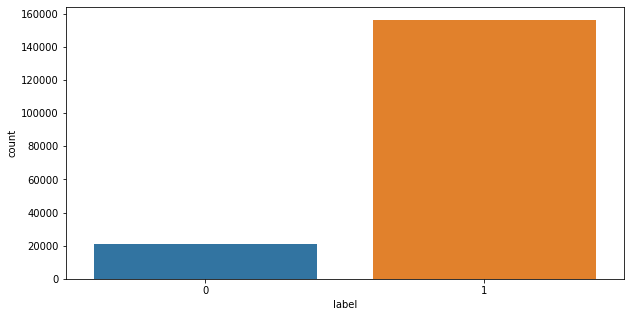

In [22]:
# visualise target 
plt.figure(figsize=(10,5))
sns.countplot(mc_df['label'])
plt.show()

It is clear that the target is baised. The total number of times users were able to repay the loan amount in time dominates the total number of times users failed to do so.

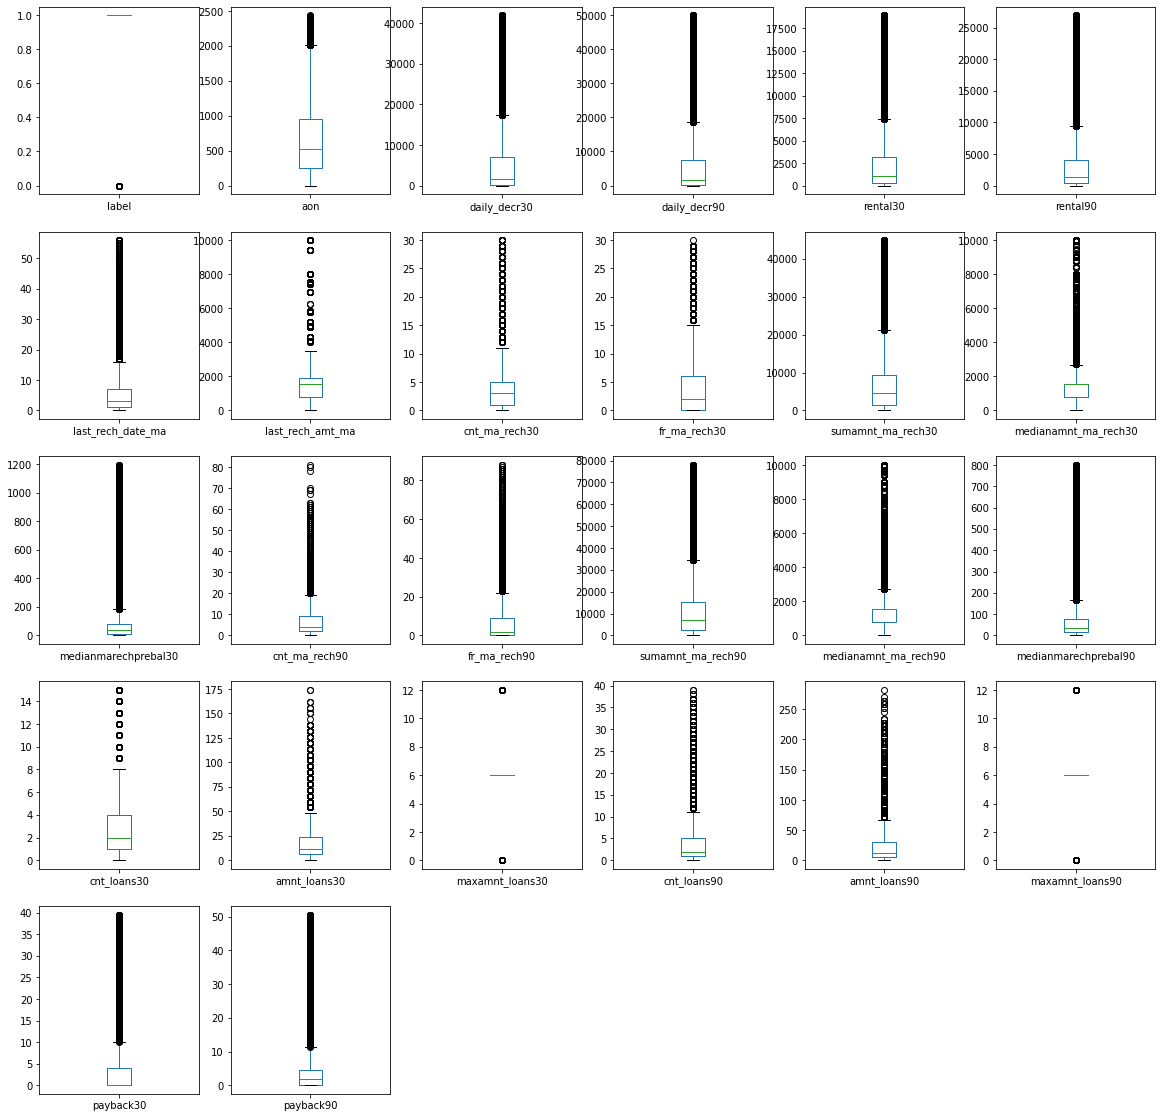

In [23]:
#check outliers in data
mc_df.plot(kind='box',subplots=True,layout=(5,6),figsize=(20,20))
plt.show()

There are lot of outliers seen in the data, let's check total number of rows having outliers.

In [24]:
outlier_row_indexes = set()  # empty set, to store unique indexes with outliers
# loop to identify outliers in each feature
for col in mc_df.columns[1:] :
  if col not in ['maxamnt_loans30','maxamnt_loans90'] :
    outliers = []
    # calculate interquartile range
    q25, q75 = np.percentile(mc_df[col], 25), np.percentile(mc_df[col], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5   # 1.5 is multiplying factor k, used to decide outlier cut-off values
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    for i,x in enumerate(mc_df[col]) :
      if x < lower or x > upper :
        outliers.append(x)
        outlier_row_indexes.add(i)
    print('Identified outliers in ',col, ':', len(outliers))
print('\nIdentified rows with outliers :', len(outlier_row_indexes))

Identified outliers in  aon : 1965
Identified outliers in  daily_decr30 : 11999
Identified outliers in  daily_decr90 : 13640
Identified outliers in  rental30 : 14499
Identified outliers in  rental90 : 14995
Identified outliers in  last_rech_date_ma : 13952
Identified outliers in  last_rech_amt_ma : 22553
Identified outliers in  cnt_ma_rech30 : 8290
Identified outliers in  fr_ma_rech30 : 8639
Identified outliers in  sumamnt_ma_rech30 : 8682
Identified outliers in  medianamnt_ma_rech30 : 23589
Identified outliers in  medianmarechprebal30 : 20109
Identified outliers in  cnt_ma_rech90 : 7672
Identified outliers in  fr_ma_rech90 : 21321
Identified outliers in  sumamnt_ma_rech90 : 9319
Identified outliers in  medianamnt_ma_rech90 : 23406
Identified outliers in  medianmarechprebal90 : 19187
Identified outliers in  cnt_loans30 : 5795
Identified outliers in  amnt_loans30 : 7798
Identified outliers in  cnt_loans90 : 7956
Identified outliers in  amnt_loans90 : 9530
Identified outliers in  payback

There are 102314 rows with outliers in the data, but as we have already removed unreal values, this means these outliers are still practically possible values. These outliers are the result of the bais and variance in data of the features.

So, I did not remove the outliers

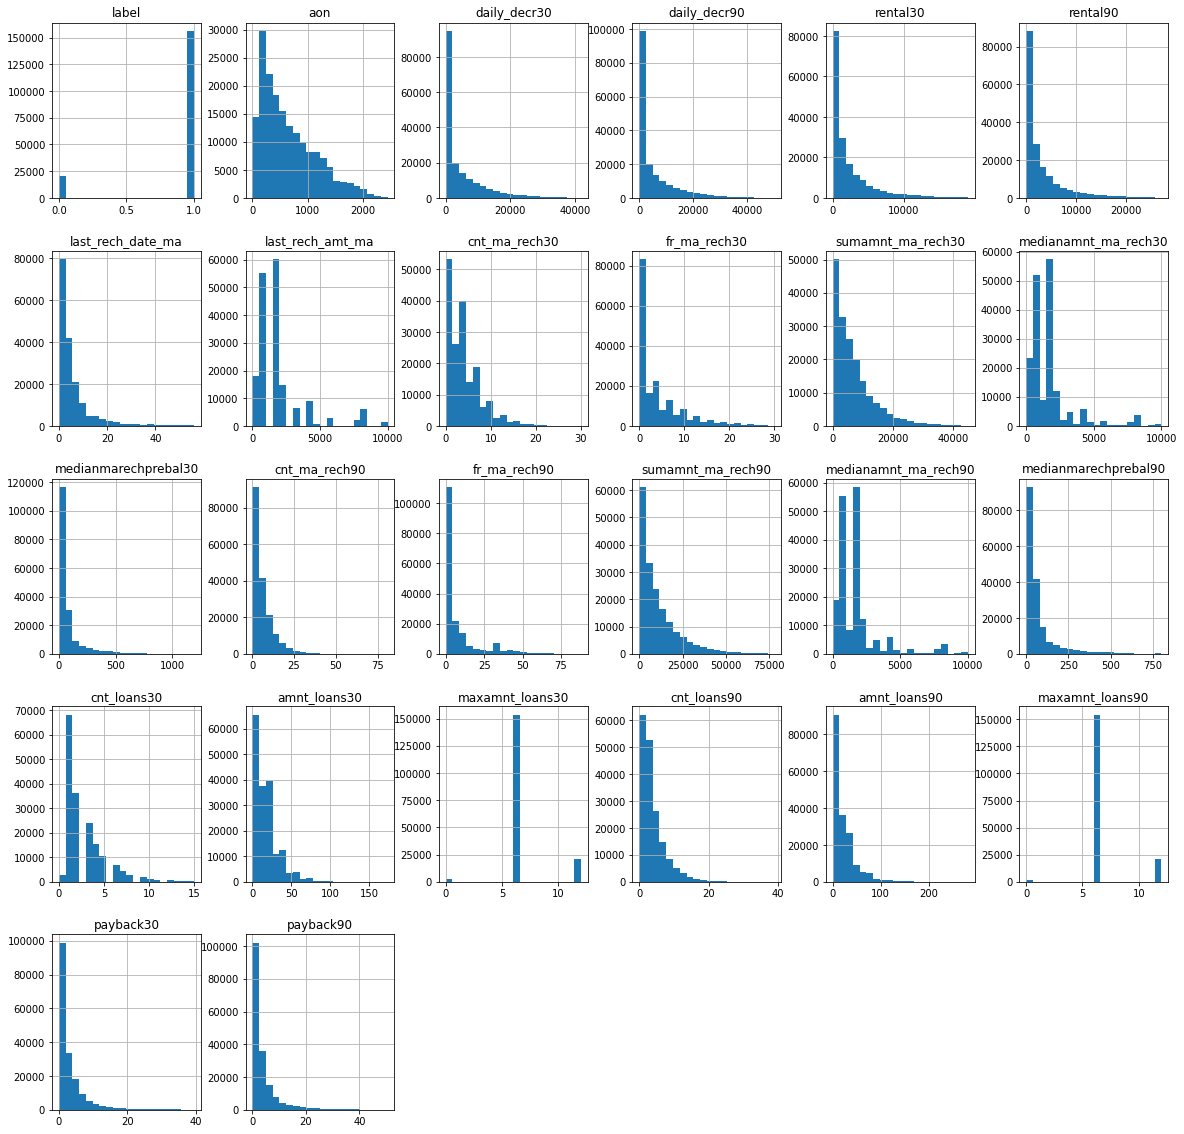

label                  -2.362986
aon                     0.969074
daily_decr30            2.017125
daily_decr90            2.154766
rental30                2.222075
rental90                2.319177
last_rech_date_ma       2.922830
last_rech_amt_ma        2.241805
cnt_ma_rech30           1.759042
fr_ma_rech30            1.806266
sumamnt_ma_rech30       1.744120
medianamnt_ma_rech30    2.468657
medianmarechprebal30    3.270598
cnt_ma_rech90           2.065051
fr_ma_rech90            2.271024
sumamnt_ma_rech90       1.886690
medianamnt_ma_rech90    2.514181
medianmarechprebal90    3.095373
cnt_loans30             1.855961
amnt_loans30            2.048694
maxamnt_loans30         1.487619
cnt_loans90             2.327498
amnt_loans90            2.422149
maxamnt_loans90         1.753200
payback30               3.214709
payback90               3.099308
dtype: float64

In [25]:
#check skewness of data
mc_df.hist(grid=True,bins=20,layout=(5,6),figsize=(20,20))
plt.show()
mc_df.skew()

The continuous features are highly right skewed.

In [26]:
# reduce skewness of continuous features using log and square transform, till the skewness coefficient is 0.5 or below 0.5 
for s in mc_df.columns[1:] :
  if s not in ['maxamnt_loans30','maxamnt_loans90'] :
    while mc_df[s].skew() > 0.5 :
      mc_df[s]=np.log1p(mc_df[s])
    while mc_df[s].skew() < -0.5 :
      mc_df[s]=np.square(mc_df[s])

In [27]:
# check improved skewness coefficients
mc_df.skew()

label                  -2.362986
aon                    -0.433946
daily_decr30           -0.475147
daily_decr90           -0.452182
rental30               -0.152746
rental90               -0.139575
last_rech_date_ma       0.417481
last_rech_amt_ma        0.504287
cnt_ma_rech30          -0.107145
fr_ma_rech30            0.342959
sumamnt_ma_rech30      -0.013420
medianamnt_ma_rech30    0.366407
medianmarechprebal30    0.631680
cnt_ma_rech90          -0.144502
fr_ma_rech90            0.491077
sumamnt_ma_rech90       0.069234
medianamnt_ma_rech90    0.462601
medianmarechprebal90    0.591839
cnt_loans30            -0.006706
amnt_loans30           -0.146315
maxamnt_loans30         1.487619
cnt_loans90             0.132324
amnt_loans90            0.142260
maxamnt_loans90         1.753200
payback30               0.270714
payback90               0.095202
dtype: float64

Successfully reduced skewness in features.

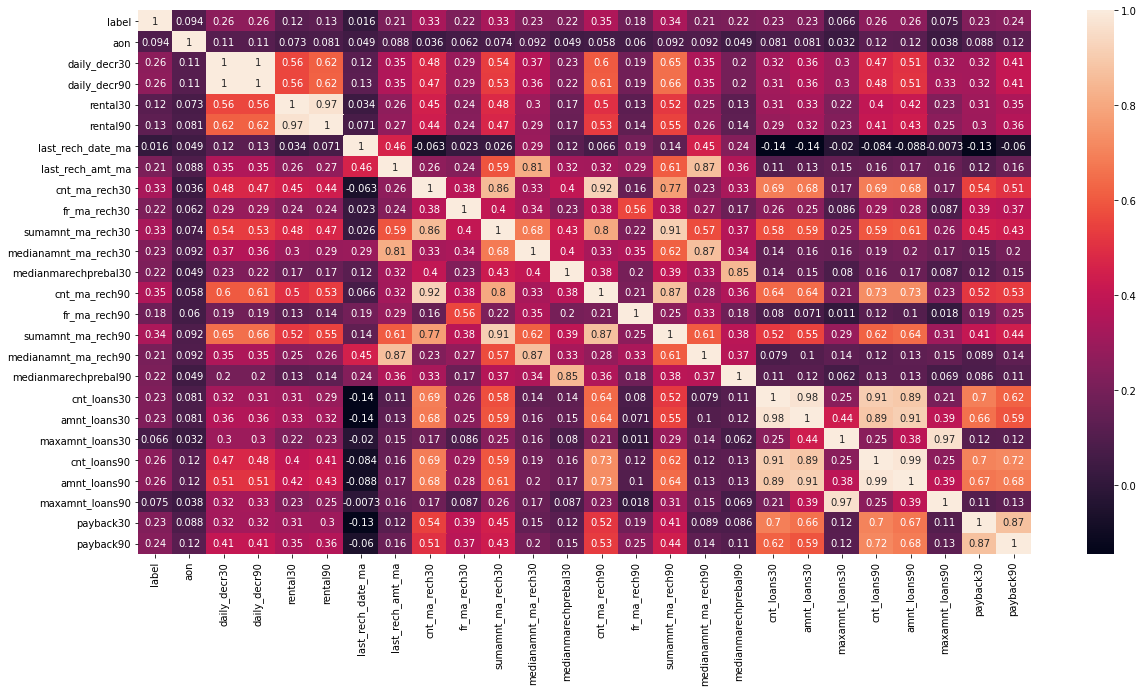

In [28]:
#plotting correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(mc_df.corr(),annot=True)
plt.show()

There are a lot of multicolinear features, this will create the problem of multicolinearity, to deal with this problem, I am dropping one out of two highly correlated features(>0.95), and then use PCA on selective correlated features.

In [29]:
# drop one feature from the pairs of multicolinear features which are highly correlated (>0.95) 
mc_df.drop(['daily_decr30','rental30','amnt_loans30','maxamnt_loans30','amnt_loans90'],axis =1 , inplace =True)

In [30]:
# drop feature 'medianmarechprebal30'(>0.85) colinear with only one feature but less correlated with all other feature
mc_df.drop('medianmarechprebal30',axis=1,inplace=True)

In [31]:
# seperating target variable
x = mc_df.drop('label',axis=1)
y = mc_df['label']

In [32]:
# standard scale input variables
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x.head() # check values

,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,cnt_loans90,maxamnt_loans90,payback30,payback90
0,-0.626490,0.556620,-0.866095,-0.404773,0.079728,-0.294739,1.994229,-0.297217,0.205077,-0.594057,1.390700,-0.570890,0.172871,-0.986593,-0.023490,-0.238503,-0.325207,1.969257,1.788778
1,0.475676,1.029620,0.687970,1.739958,1.882882,-0.834433,-1.082665,0.205536,2.078884,-1.060438,-1.115199,-0.150082,2.128334,0.333863,-0.927671,-1.047151,2.589710,-0.952891,-1.051543
2,0.148075,0.286677,-0.213809,-0.087697,0.079728,-0.834433,-1.082665,-0.728176,0.205077,-1.060438,-1.115199,-0.931606,0.172871,0.406037,-0.927671,-1.047151,-0.325207,-0.952891,-1.051543
3,-0.764872,-1.138321,-1.086873,2.503927,-0.378718,-1.757046,-1.082665,-1.720046,-1.785445,-1.060438,-1.115199,-1.130305,-0.324298,-1.305663,-0.023490,-0.238503,-0.325207,-0.952891,-1.051543
4,0.802732,-0.477790,-0.096637,0.158246,0.539384,1.010793,0.010919,1.569951,0.682744,0.669607,-0.224557,1.173815,0.982026,-0.110959,1.591548,1.205895,-0.325207,0.605445,0.463156


In [33]:
# Principal Component Analysis
from sklearn.decomposition import PCA
# list of multicolinear features
multi_cols = ['daily_decr90', 'rental90','last_rech_amt_ma', 'cnt_ma_rech30','sumamnt_ma_rech30', 'medianamnt_ma_rech30','cnt_ma_rech90',
              'sumamnt_ma_rech90','medianamnt_ma_rech90', 'cnt_loans30','cnt_loans90', 'payback30', 'payback90']
# apply PCA to multicolinear features
pca = PCA(n_components=7)
pca_comps = pd.DataFrame(pca.fit_transform(x[multi_cols]),columns=['pca_1','pca_2','pca_3','pca_4','pca_5','pca_6','pca_7'])
# combing all the pca components with training set x and dropping all the features used to create these components 
x = pd.concat((x, pca_comps), axis=1)
x.drop(multi_cols, axis=1, inplace=True)
x.head() #check data

,aon,last_rech_date_ma,fr_ma_rech30,fr_ma_rech90,medianmarechprebal90,maxamnt_loans90,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7
0,-0.626490,-0.404773,1.994229,1.390700,-0.986593,-0.325207,-0.321559,-0.790462,-1.872736,1.617130,1.070179,-0.887178,-0.350775
1,0.475676,1.739958,-1.082665,-1.115199,0.333863,2.589710,-0.039256,4.157948,0.026809,1.157639,-0.644351,-0.033991,-0.608084
2,0.148075,-0.087697,-1.082665,-1.115199,0.406037,-0.325207,2.147065,1.369643,0.392407,0.484093,-0.256026,-0.294578,-0.405881
3,-0.764872,2.503927,-1.082665,-1.115199,-1.305663,-0.325207,3.574974,-0.538267,-0.453235,-0.107934,-1.284325,-0.229295,1.104367
4,0.802732,0.158246,0.010919,-0.224557,-0.110959,-0.325207,-2.879733,-0.020841,-1.085076,-1.251582,-0.517310,0.430701,-0.067587


# TRAINING AND TESTING THE MODEL

The target variable is heavily biased, so instead of using train-test-split method, I will mannually split the data in such way that, the majority(90%) of the minor class in the target is given for training. This way, it will be sure that the model is getting huge portion of the data for learning as the class 0 has very low population as compared to class 1.

In [34]:
# create new df
new_df = pd.concat((x, y), axis=1)
new_df.head() # check data

,aon,last_rech_date_ma,fr_ma_rech30,fr_ma_rech90,medianmarechprebal90,maxamnt_loans90,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,label
0,-0.626490,-0.404773,1.994229,1.390700,-0.986593,-0.325207,-0.321559,-0.790462,-1.872736,1.617130,1.070179,-0.887178,-0.350775,0
1,0.475676,1.739958,-1.082665,-1.115199,0.333863,2.589710,-0.039256,4.157948,0.026809,1.157639,-0.644351,-0.033991,-0.608084,1
2,0.148075,-0.087697,-1.082665,-1.115199,0.406037,-0.325207,2.147065,1.369643,0.392407,0.484093,-0.256026,-0.294578,-0.405881,1
3,-0.764872,2.503927,-1.082665,-1.115199,-1.305663,-0.325207,3.574974,-0.538267,-0.453235,-0.107934,-1.284325,-0.229295,1.104367,1
4,0.802732,0.158246,0.010919,-0.224557,-0.110959,-0.325207,-2.879733,-0.020841,-1.085076,-1.251582,-0.517310,0.430701,-0.067587,1


In [35]:
# create two dfs where each df has rows corresponding to same class in target
df_0 = new_df[new_df['label'] == 0]
df_1 = new_df[new_df['label'] == 1]  

In [36]:
# check shapes of new dfs
df_0.shape , df_1.shape

((20965, 14), (156176, 14))

To split the data into 70% training and 30% testing sets, the train set should have **124000** rows and test set should have **53141** rows.

The train set should have 90% of df_0 i.e **18000** rows, so that the model gets more data on class 0 to learn. And for class 0 , there will be **2965** rows available for testing the models performance.

So train set should have **106000** rows from df_1 and test set should have **50176** rows from df_1.

In [37]:
# train set should contain 90% of df_0 i.e 18000 rows from df_0 and hence should have 106000 rows from df_1
train = pd.concat((df_0.iloc[:18000,:],df_1.iloc[:106000,:]), axis = 0)
x_train = train.drop('label',axis = 1)
y_train = train['label']

# test set should contain 2965 rows from df_0 and 50176 rows from df_1 
test = pd.concat((df_0.iloc[18000:,:],df_1.iloc[106000:,:]), axis = 0)
x_test = test.drop('label',axis = 1)
y_test = test['label']

In [38]:
# check the shape of splitted data
train.shape, test.shape

((124000, 14), (53141, 14))

In [39]:
# importing all the classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

In [40]:
# importing all the metrics for performance analysis
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score

In [41]:
#selecting the algorithm which works best 
model_list=[LogisticRegression(),KNeighborsClassifier(),GaussianNB(),SVC(),DecisionTreeClassifier(),
            RandomForestClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(),XGBClassifier(silent=True)]

for m,model in enumerate(model_list, start = 1) :
  print(m,'.', model, ':')
  model.fit(x_train,y_train)
  prediction=model.predict(x_test)
  print('accuracy_score :',accuracy_score(y_test,prediction))
  print('confusion matrix :','\n',confusion_matrix(y_test,prediction))
  print('classification report :','\n',classification_report(y_test,prediction))
  print('roc_auc_score : ',roc_auc_score(y_test,prediction))
  print('\n')

1 . LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) :
accuracy_score : 0.933798761784686
confusion matrix : 
 [[  723  2242]
 [ 1276 48900]]
classification report : 
               precision    recall  f1-score   support

           0       0.36      0.24      0.29      2965
           1       0.96      0.97      0.97     50176

    accuracy                           0.93     53141
   macro avg       0.66      0.61      0.63     53141
weighted avg       0.92      0.93      0.93     53141

roc_auc_score :  0.6092071859835839


2 . KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

According to the problem statement, the most important thing for our model to predict correctly is the negative class(0), i.e user fails to repays the loan, because if our model predicts it wrong, then it will be a loss. 

Therefore, while evaluating all the above metrics for all the used algorithms, the most important metric for our model will be the 'Precision' score. The higher the precision for class '0' , the lower will be the loss. 

After 'Precision' the next important evaluation metric for our problem is 'ROC AUC' score. It is very much important for our model to distinguish between the positive(1) and negative(0) classes. The more the value of roc auc score the better will be the performance of the model at distinguishing between the users who will be able to repay loan and the users who will fail.

Finally after giving importance to 'Precision score' for class 0, and ROC AUC score, XGBClassifier seems to be the best algorithm for our problem and according to the available data.



In [43]:
xgbc = XGBClassifier(verbosity=0)
# importing GridSearchCV 
from sklearn.model_selection import GridSearchCV
# tuning hyperparameters of XGBClassifier
hyper_params={"n_estimators": [5,6,7],
              "min_child_weight" : [ 3, 5, 7 ]}
GCV_XGBC=GridSearchCV(estimator=xgbc,param_grid=hyper_params,cv=3) #grid_search_cv uses stratified kfold(makes sure classes are in equal proportion for each fold) when the estimator is a classifier 
GCV_XGBC.fit(x_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=0),
             iid='deprecated', n_jobs=None,
             param_grid={'min_child_weight': [3, 5, 7],
                         'n_estimators': [5, 6, 7]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score

In [44]:
GCV_XGBC.best_params_

{'min_child_weight': 3, 'n_estimators': 6}

In [45]:
# training and testing with best parameters of XGBClassifier
xgbc_best=XGBClassifier(n_estimators=6,min_child_weight=3)
xgbc_best.fit(x_train,y_train)
predictions=xgbc_best.predict(x_test)
print('ROC AUC score :',roc_auc_score(y_test,predictions))
print('confusion matrix : ','\n',confusion_matrix(y_test,predictions))
print('classification report : ','\n',classification_report(y_test,predictions))

ROC AUC score : 0.6043238458299636
confusion matrix :  
 [[  646  2319]
 [  463 49713]]
classification report :  
               precision    recall  f1-score   support

           0       0.58      0.22      0.32      2965
           1       0.96      0.99      0.97     50176

    accuracy                           0.95     53141
   macro avg       0.77      0.60      0.64     53141
weighted avg       0.93      0.95      0.94     53141



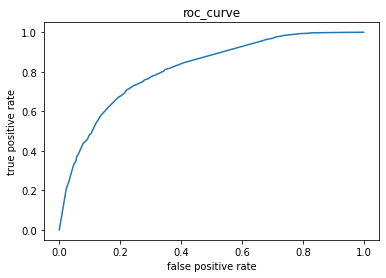

In [46]:
#plotting roc_curve 
pred_prob=xgbc_best.predict_proba(x_test)[:,1]
fpr,tpr,threshholds=roc_curve(y_test,pred_prob,pos_label=True)
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('roc_curve')
plt.show()

In [47]:
#finally fitting 100% data for deployment
xgbc_best.fit(x,y)
xgbc_best.score(x,y)

0.9007683145065231

In [49]:
#saving the model using joblib
import joblib 
joblib.dump(xgbc_best,'micro_credit.pkl')

['micro_credit.pkl']

# CONCLUSION 

The data available was not sufficient to predict the users who will fail to pay the loan in given time. Addition of more data for class 0 will help in improving the precision of the predictions. As the target was heavily biased by users who can pay loan in given time, the model misses rarely in predicting about such users.

The target was baised, so it was necessary to use a huge amount of minor class data in the training set. If more data is added, there will be a scope for trying different proportions of data for train and test sets and evaluate how various models work accordingly.

If the bias in the data is removed there is more scope to evaluate various algorithms on the basis of other metrics also, like accuracy score.

More parameters can be tuned using Exhaustive grid search, due to time constraint, I used less parameters for tuning.

The statistical modeling, plays an important role for better results.

